In [3]:
import numpy
import tensorflow as tf
from tensorflow import keras
#from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras import utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[0]

array([6], dtype=uint8)

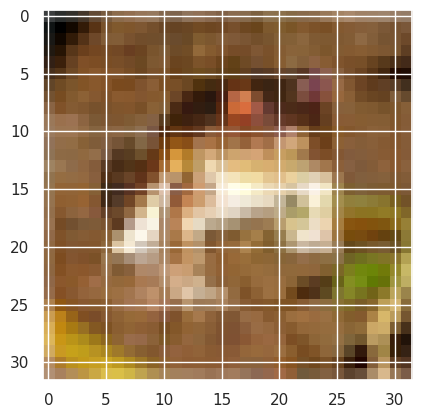

In [7]:
plt.imshow(X_train[0])

In [8]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# One-hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
num_class = y_test.shape[1] #10

In [12]:
X_train.shape[1:]

(32, 32, 3)

In [13]:
#Building the Model

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 17s 16ms/step - loss: 1.4888 - accuracy: 0.4656 - val_loss: 1.2522 - val_accuracy: 0.5415
Epoch 2/30
782/782 [==============================] - 10s 13ms/step - loss: 1.0545 - accuracy: 0.6280 - val_loss: 0.8774 - val_accuracy: 0.6880
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.9070 - accuracy: 0.6834 - val_loss: 0.8399 - val_accuracy: 0.7092
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8231 - accuracy: 0.7128 - val_loss: 0.7342 - val_accuracy: 0.7496
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7590 - accuracy: 0.7376 - val_loss: 0.6984 - val_accuracy: 0.7602
Epoch 6/30
782/782 [==============================] - 10s 12ms/step - loss: 0.7100 - accuracy: 0.7529 - val_loss: 0.6751 - val_accuracy: 0.7604
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.6719 - accuracy: 0.7665 - val_loss: 0.6253 - val_accuracy:

In [22]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


<Axes: >

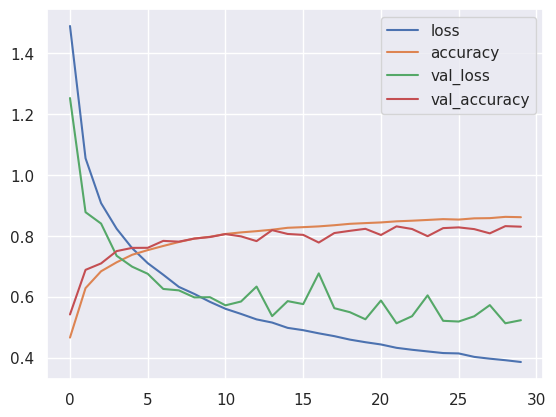

In [23]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

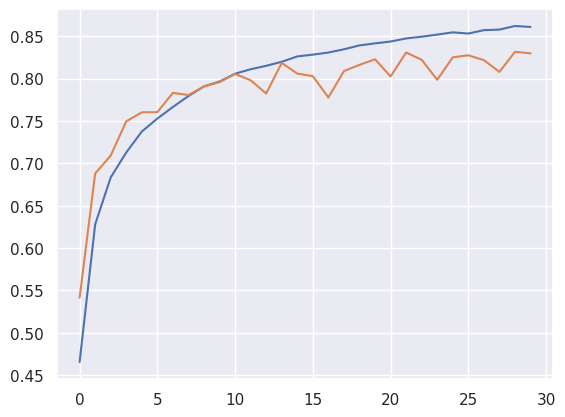

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [25]:
model.save('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model2 = load_model('CNN_cifar10.h5')

In [27]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
np.argmax(model2.predict(X_test[0:10])[0])

1/1 [==============================] - 0s 352ms/step


3

In [29]:
labels[3]

'cat'

In [30]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

313/313 [==============================] - 1s 3ms/step


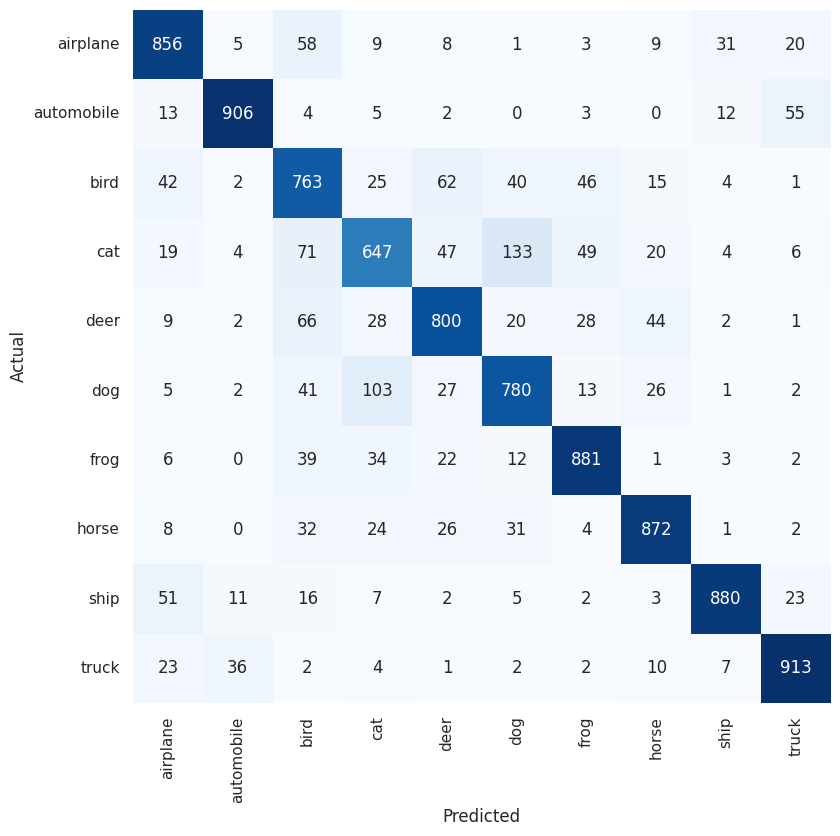

In [33]:
# Predicting test data
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

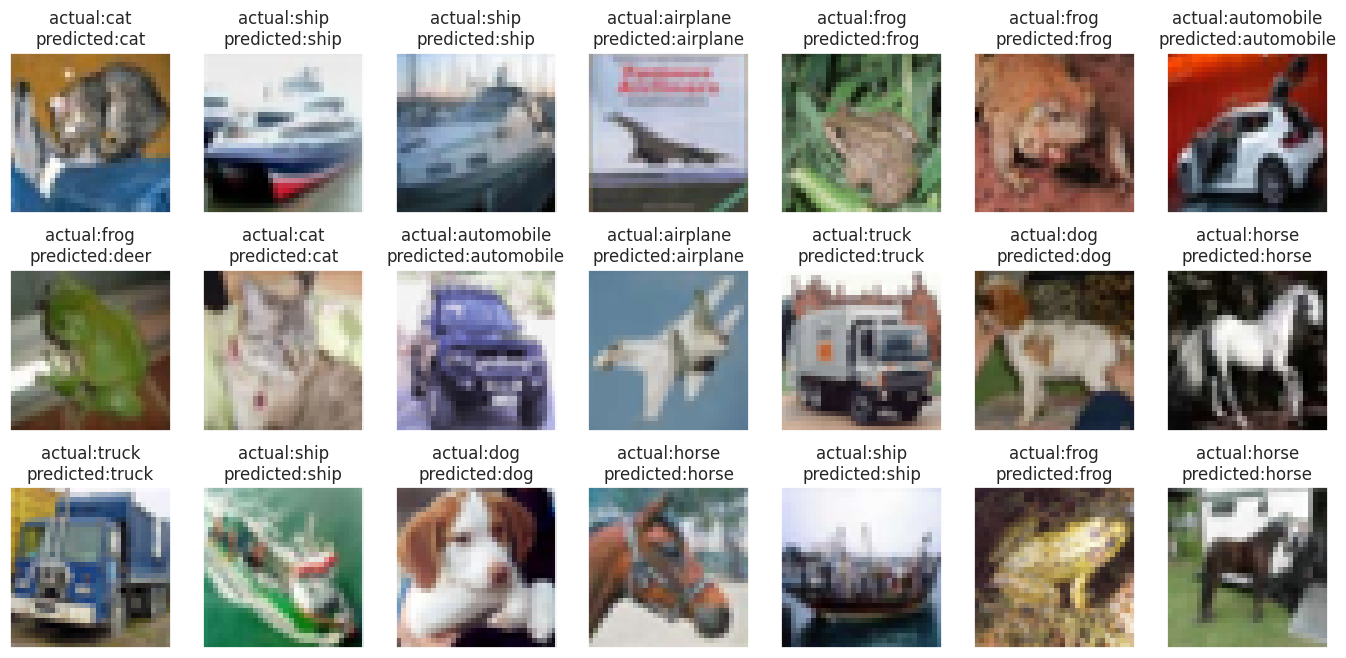

In [34]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()